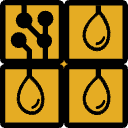

# This is the a breif description of the features in the Dataset

**About Dataset**
A powerplant engine( gas-turbine) is mainly used to generate electricity. Since the engine can different types of fuels, the engine can have different levels of CO2 and NO emission gases.
This dataset is generated from a gas turbine in Turkey. More info:
https://journals.tubitak.gov.tr/elektrik/issues/elk-19-27-6/elk-27-6-54-1807-87.pdf

Column name descriptions:

Variable (Abbr.) Unit Min Max Mean

**Ambient temperature (AT)** C â€“6.23 37.10 17.71

**Ambient pressure (AP)** mbar 985.85 1036.56 1013.07

**Ambient humidity (AH)** (%) 24.08 100.20 77.87

**Air filter difference pressure (AFDP)** mbar 2.09 7.61 3.93

**Gas turbine exhaust pressure (GTEP)** mbar 17.70 40.72 25.56

**Turbine inlet temperature (TIT)** C 1000.85 1100.89 1081.43

**Turbine after temperature (TAT)** C 511.04 550.61 546.16

**Compressor discharge pressure (CDP)** mbar 9.85 15.16 12.06

**Turbine energy yield (TEY)** MWH 100.02 179.50 133.51

**Carbon monoxide (CO)** mg/m3 0.00 44.10 2.37

**Nitrogen oxides (NOx)** mg/m3 25.90 119.91 65.29

## Important Libraries

Changing the directory and importing neccessary libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
path = "C:/Users/Omid/Desktop/MDTE/Challenge 2/DT/DATASETS"
os.chdir(path)

In [2]:
GT = pd.read_csv('gt_full.csv')
GT.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


## Spliting Train and test Data

In [3]:
from sklearn.model_selection import train_test_split

Target = GT[['CO','NOX']]

Feature = GT.drop(columns=['CO','NOX',],axis=1)

In [4]:
Feature.head()

,Unnamed: 0,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910


In [5]:
Target.head()

,CO,NOX
0,0.32663,81.952
1,0.44784,82.377
2,0.45144,83.776
3,0.23107,82.505
4,0.26747,82.028


In [6]:
Feature.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

In [7]:
X , X_test , Y , Y_test = train_test_split(Feature,Target['CO'],train_size=0.85,random_state=42)

## Defining functions for Visualization

In [8]:
def box_hist_plot_complete(df):
    for column in df.columns:
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
        sns.boxplot(x = df[column], ax=ax_box)
        sns.histplot(x = df[column], ax=ax_hist,bins=100,kde=True, legend=True)
        ax_box.set(xlabel='')
        #ax_hist.axvline(avg_df[column], color="b",ls ="--" )               #These parts can also be implemented
        #ax_hist.axvline(med_df[column], color="r",ls ="--" )
        #ax_hist.axvline(mode_df[column], color="k",ls ="--" )
        ax_hist.axvline(np.quantile(df[column],0.25), color="m",ls ="--" )
        ax_hist.axvline(np.quantile(df[column],0.75), color="m",ls ="--" )
        #ax_hist.legend("quantile")
        ax_hist.set_title(f"Histogram {column}")
        #sns.move_legend(ax_hist, "upper left", bbox_to_anchor=(1, 1))            #move the legend because the image space is smaller now.

        plt.show()
def box_hist_plot(df,column):
 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)})
    sns.boxplot(x = df[column], ax=ax_box)
    sns.histplot(x = df[column], ax=ax_hist,bins=100,kde=True, legend=True)
    ax_box.set(xlabel='')
        #ax_hist.axvline(avg_df[column], color="b",ls ="--" )               #These parts can also be implemented
        #ax_hist.axvline(med_df[column], color="r",ls ="--" )
        #ax_hist.axvline(mode_df[column], color="k",ls ="--" )
    ax_hist.axvline(np.quantile(df[column],0.25), color="m",ls ="--" )
    ax_hist.axvline(np.quantile(df[column],0.75), color="m",ls ="--" )
    #ax_hist.legend("quantile")
    ax_hist.set_title(f"Histogram {column}")
        #sns.move_legend(ax_hist, "upper left", bbox_to_anchor=(1, 1))            #move the legend because the image space is smaller now.

    plt.show()

## Function for correlation matrix

In [9]:
# Compute the correlation matrix
def Cor_Matrix(df):
    correlation_matrix = df.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

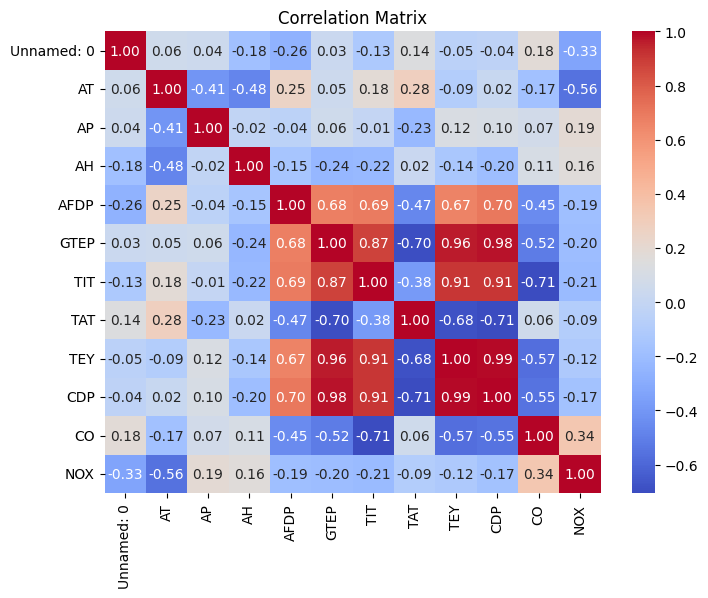

In [10]:
Cor_Matrix(GT)

# Data Preprocessing

In [11]:
X.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
count,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000
mean,17.719029,1013.041929,77.912898,3.924437,25.553307,1081.400698,546.163099,133.470366,12.058264
std,7.430450,6.444635,14.452980,0.774725,4.199038,17.541481,6.833211,15.624498,1.089234
min,-6.234800,986.250000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800
25%,11.806500,1008.800000,68.276500,3.353950,23.091000,1071.600000,544.720000,124.295000,11.424000
50%,17.817000,1012.600000,80.543000,3.936800,25.098000,1085.900000,549.880000,133.730000,11.963000
75%,23.661000,1016.900000,89.372500,4.377250,29.069000,1097.000000,550.040000,144.080000,12.854500
max,37.103000,1036.600000,100.200000,7.554900,40.716000,1100.900000,550.610000,179.500000,15.159000


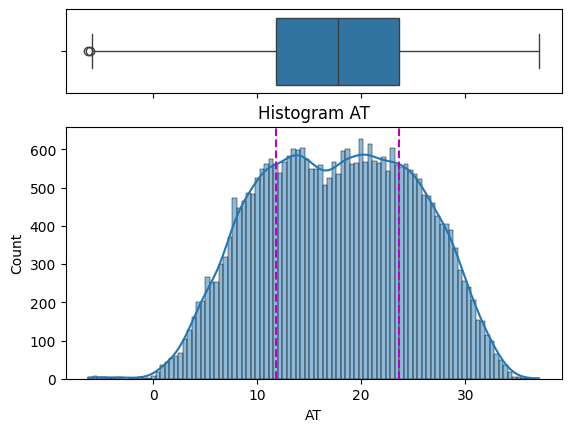

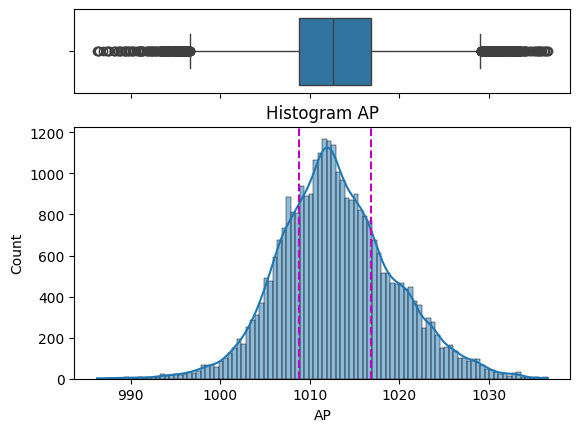

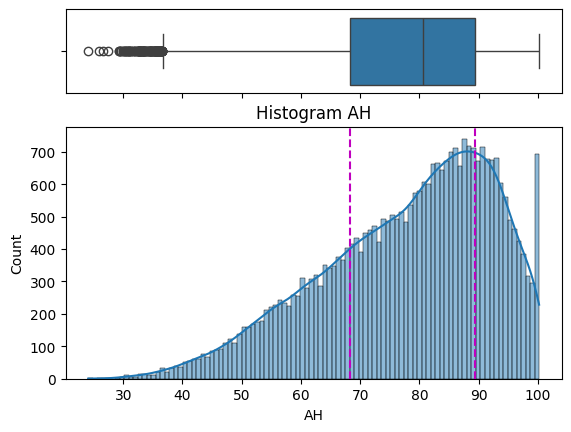

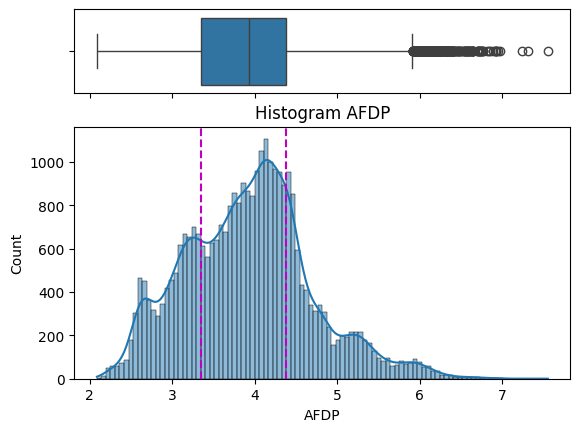

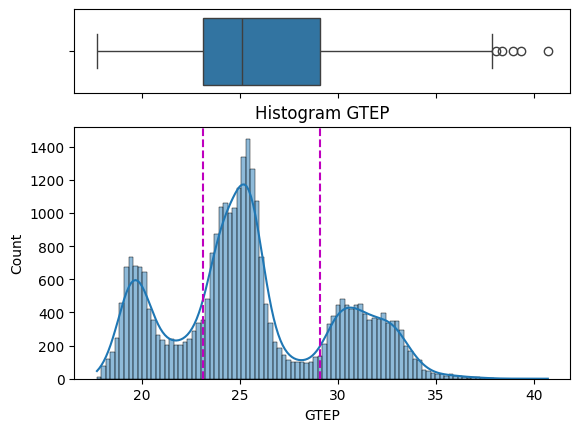

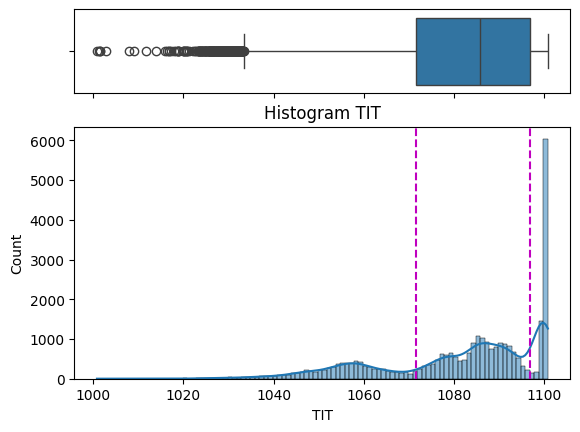

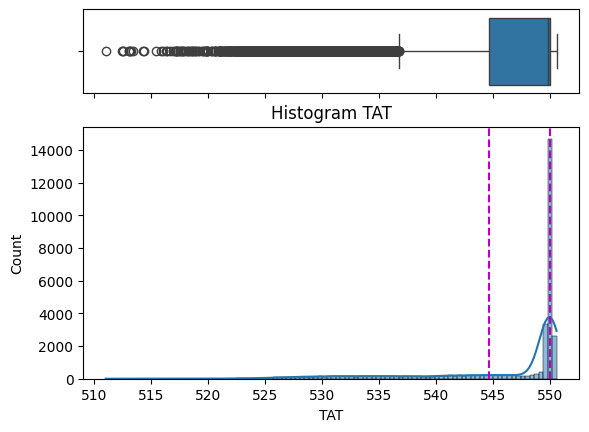

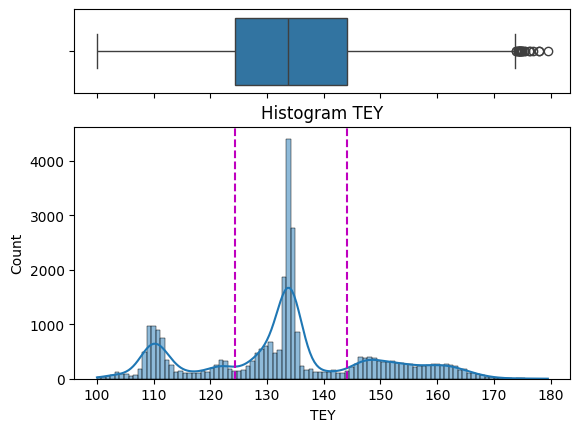

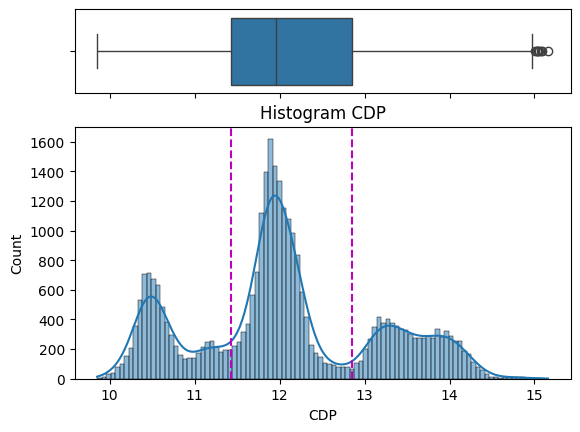

In [12]:
box_hist_plot_complete(X)

## Droping outliers in a Dataset

In [13]:
def outliers(data,target,cat):
    # Calculate Q1, Q3, and IQR
    Q1 = data[cat].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[cat].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_list = list(data[cat][(data[cat] < lower_bound) | (data[cat] > upper_bound)])

    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"outlier list is:",outliers_list)

    # Identify indices of rows to keep
    valid_indices = data[(data[cat] >= lower_bound) & (data[cat] <= upper_bound)].index

    # Filter both features and target using valid indices
    data = data.loc[valid_indices]
    target = target.loc[valid_indices]
    return data
    
            


    
    
    

    

In [14]:
outliers(X,Y,'GTEP')

Lower bound: 14.124000000000004
Upper bound: 38.035999999999994
outlier list is: [38.051, 40.716, 39.37, 38.362, 38.922]


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


In [15]:
outliers(X,Y,'CDP')

Lower bound: 9.27825
Upper bound: 15.000250000000001
outlier list is: [15.043, 15.029, 15.002, 15.031, 15.055, 15.081, 15.159, 15.083]


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
8537,5.8946,1027.80,74.088,4.4051,23.658,1083.5,550.02,133.78,11.830
29199,15.7260,1017.10,56.171,3.7053,32.945,1100.1,542.88,151.83,13.374
5707,24.6300,1011.90,68.847,4.0278,25.674,1092.3,550.05,134.22,12.209
19735,30.4850,1014.90,55.335,3.8906,20.640,1061.7,550.00,110.13,10.765
10299,29.0360,1013.40,46.049,4.1492,25.690,1090.8,549.92,132.84,12.126
...,...,...,...,...,...,...,...,...,...
16850,17.4020,995.03,62.418,2.7386,19.878,1056.4,550.08,110.65,10.523
6265,14.3410,1018.80,88.657,3.9225,24.138,1087.0,550.03,133.71,11.891
11284,24.5690,1011.80,70.774,4.1297,25.681,1092.3,549.59,134.76,12.253
860,6.8058,1016.20,86.976,3.9773,23.863,1084.6,550.26,134.37,11.916


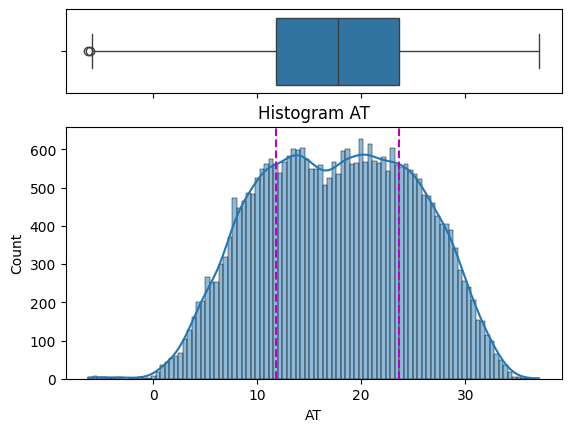

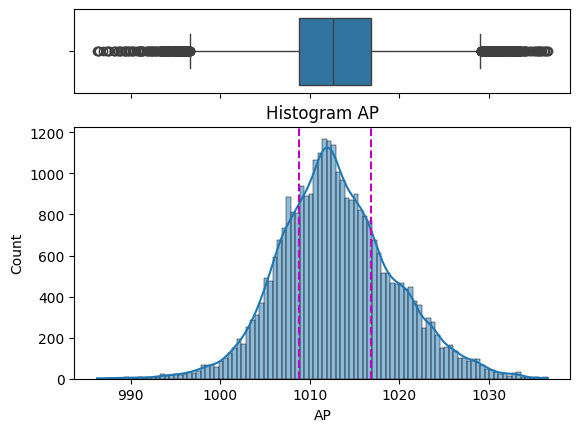

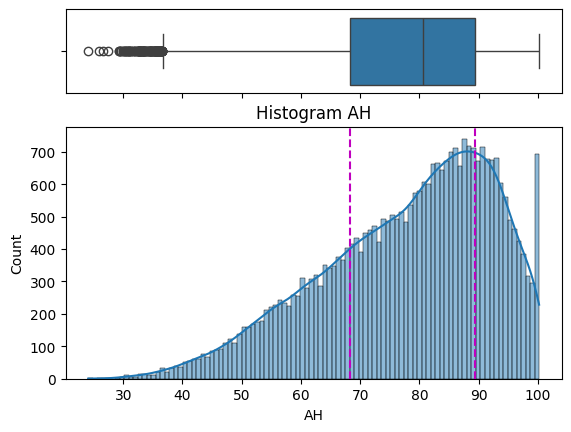

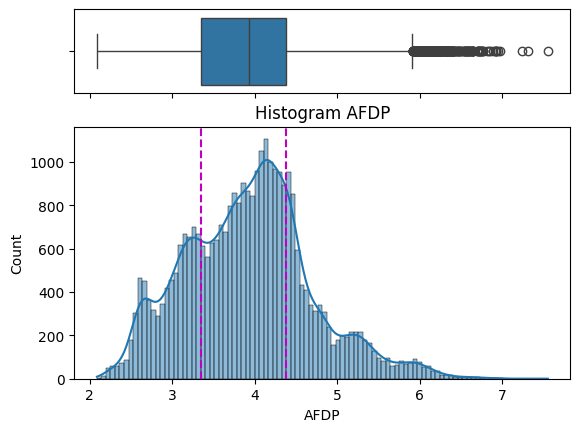

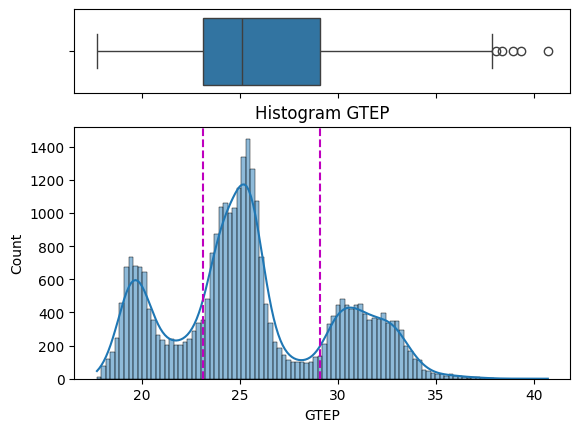

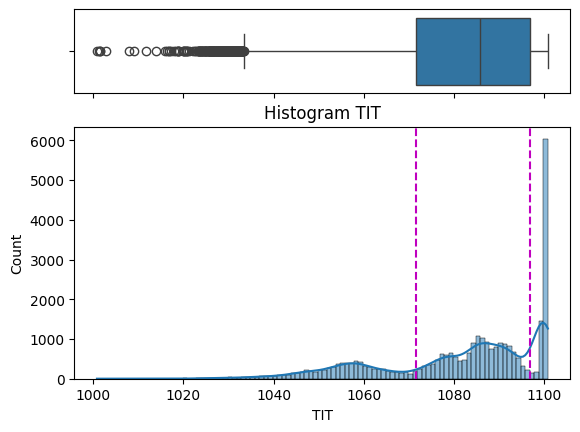

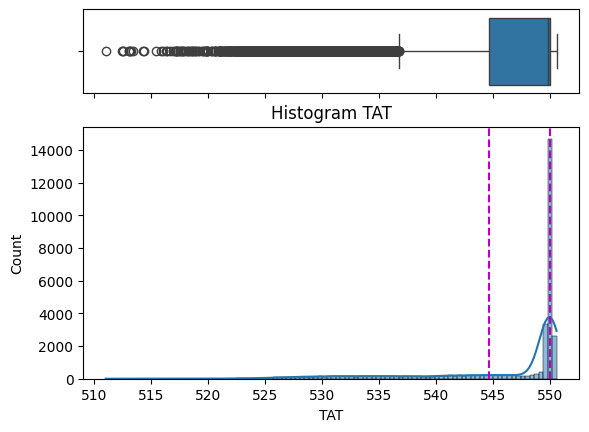

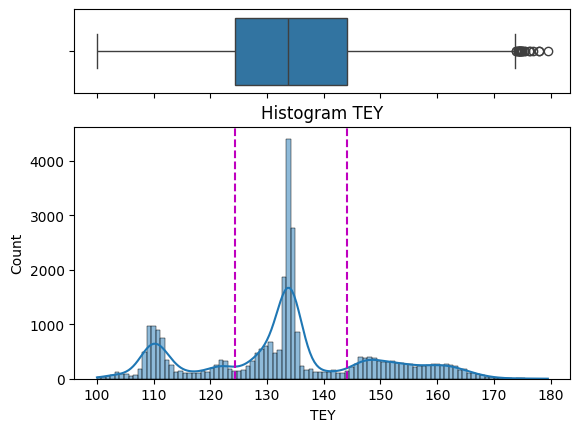

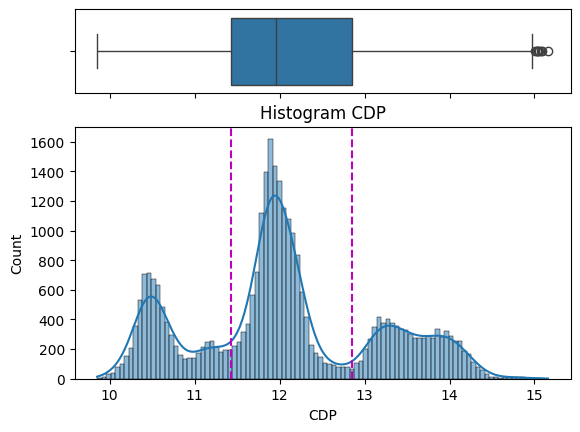

In [16]:
box_hist_plot_complete(X)

# Cross-Validation and Model Selection

For the purpose of having a better understanding of what make action makes my model more accurate, I first apply cross-validation of a Decision Tree Regressor on my data and then continued to make my model better

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
scoring = cross_val_score(DT,X,Y,scoring='neg_root_mean_squared_error')

In [18]:
scoring.mean()

np.float64(-1.530586958590162)

In [19]:
scoring.std()

np.float64(0.17983843409720354)

## Defining a function for decision tree cross-validation

In [20]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)
def crossvaldt(X):
    scoring = cross_val_score(DT,X,Y,scoring='neg_root_mean_squared_error',cv=cv)
    return scoring.mean()

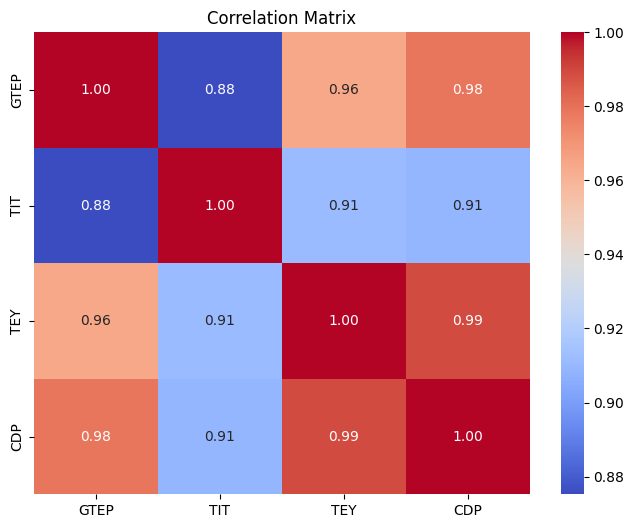

In [21]:
Cor_Matrix(X[['GTEP','TIT','TEY','CDP']])

## PCA Analyses

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
Standard_scaler = StandardScaler()
X[['GTEP','TIT','TEY','CDP']] = Standard_scaler.fit_transform(X[['GTEP','TIT','TEY','CDP']])
pca = PCA(n_components=2)
Energy = pca.fit_transform(X[['GTEP','TIT','TEY','CDP']])

In [23]:
Energy

array([[-0.26461353,  0.34067266],
       [ 2.60674353, -0.31202427],
       [ 0.40968734,  0.4814084 ],
       ...,
       [ 0.44856936,  0.46575667],
       [-0.15055443,  0.34930768],
       [ 2.32019024, -0.07192089]])

In [24]:
X_PCA = X.drop(columns = ['GTEP','TIT','TEY','CDP'])
X_PCA[['PCA1','PCA2'] ]= Energy
X_PCA.head()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
8537,5.8946,1027.8,74.088,4.4051,550.02,-0.264614,0.340673
29199,15.7260,1017.1,56.171,3.7053,542.88,2.606744,-0.312024
5707,24.6300,1011.9,68.847,4.0278,550.05,0.409687,0.481408
19735,30.4850,1014.9,55.335,3.8906,550.00,-2.489839,0.058289
10299,29.0360,1013.4,46.049,4.1492,549.92,0.286731,0.438458


In [25]:
crossvaldt(X_PCA)

np.float64(-1.513280139160552)

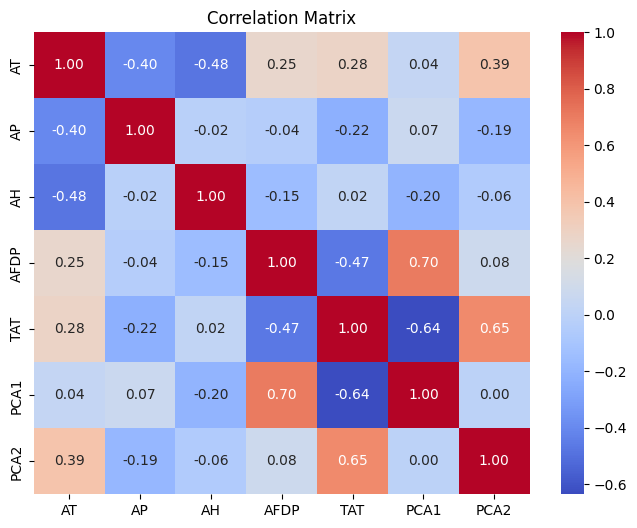

In [26]:
Cor_Matrix(X_PCA)

In order to know whether I have used the right number of components

In [27]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio by Component:", explained_variance_ratio)
print("Cumulative Explained Variance Ratio:", cumulative_variance_ratio)

Explained Variance Ratio by Component: [0.95372939 0.0359906 ]
Cumulative Explained Variance Ratio: [0.95372939 0.98971999]


In [28]:
X_PCA.describe()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
count,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,3.122300e+04,3.122300e+04
mean,17.719029,1013.041929,77.912898,3.924437,546.163099,-5.074818e-17,-9.102812e-19
std,7.430450,6.444635,14.452980,0.774725,6.833211,1.953213e+00,3.794298e-01
min,-6.234800,986.250000,24.085000,2.087400,511.040000,-4.878048e+00,-2.936594e+00
25%,11.806500,1008.800000,68.276500,3.353950,544.720000,-1.149417e+00,-2.079394e-01
50%,17.817000,1012.600000,80.543000,3.936800,549.880000,-1.603159e-02,1.785623e-02
75%,23.661000,1016.900000,89.372500,4.377250,550.040000,1.521598e+00,3.572790e-01
max,37.103000,1036.600000,100.200000,7.554900,550.610000,4.875437e+00,6.184181e-01


## Standardizing

For the features that are skewed Robust Scaler function is being used

In [29]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
X_PCA[['AH','TAT']] = rob_scaler.fit_transform(X[['AH','TAT']])

crossvaldt(X_PCA)

np.float64(-1.484964327056623)

In [30]:
X_PCA.describe()

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
count,31223.000000,31223.000000,31223.000000,31223.000000,31223.000000,3.122300e+04,3.122300e+04
mean,17.719029,1013.041929,-0.124673,3.924437,-0.698666,-5.074818e-17,-9.102812e-19
std,7.430450,6.444635,0.685105,0.774725,1.284438,1.953213e+00,3.794298e-01
min,-6.234800,986.250000,-2.676242,2.087400,-7.300752,-4.878048e+00,-2.936594e+00
25%,11.806500,1008.800000,-0.581461,3.353950,-0.969925,-1.149417e+00,-2.079394e-01
50%,17.817000,1012.600000,0.000000,3.936800,0.000000,-1.603159e-02,1.785623e-02
75%,23.661000,1016.900000,0.418539,4.377250,0.030075,1.521598e+00,3.572790e-01
max,37.103000,1036.600000,0.931788,7.554900,0.137218,4.875437e+00,6.184181e-01


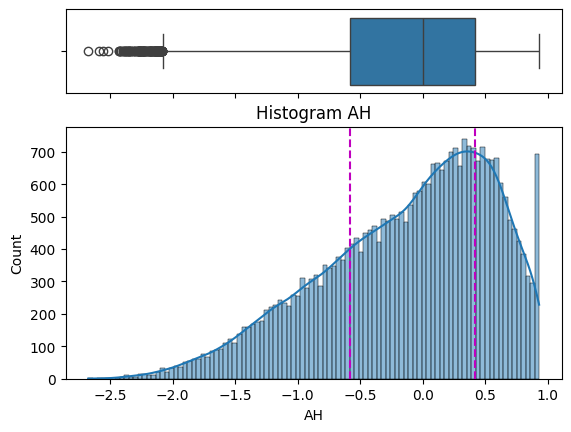

In [31]:
box_hist_plot(X_PCA,'AH')

In [32]:
Standard = StandardScaler()

In [33]:
X_PCA[['AP','AT','AFDP']] = Standard_scaler.fit_transform(X[['AP','AT','AFDP']])
crossvaldt(X_PCA)

np.float64(-1.4731644892741464)

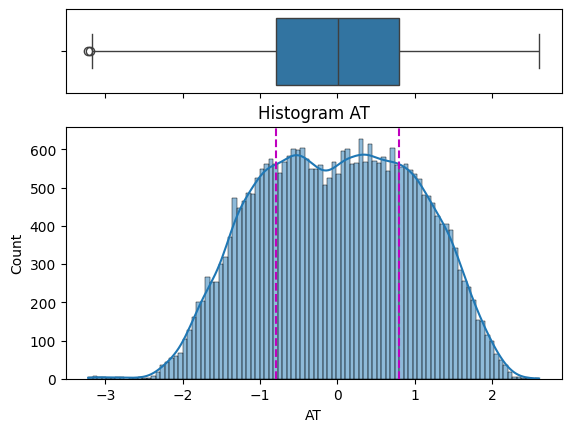

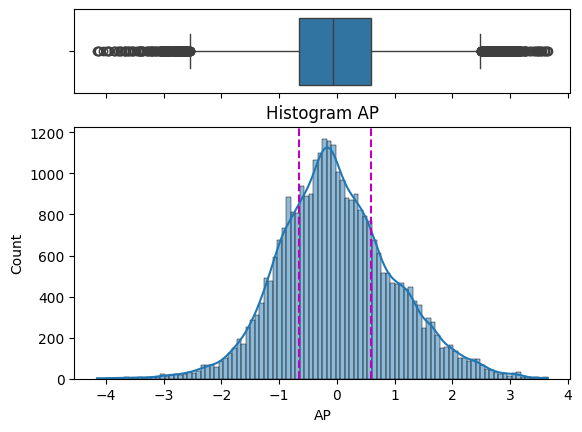

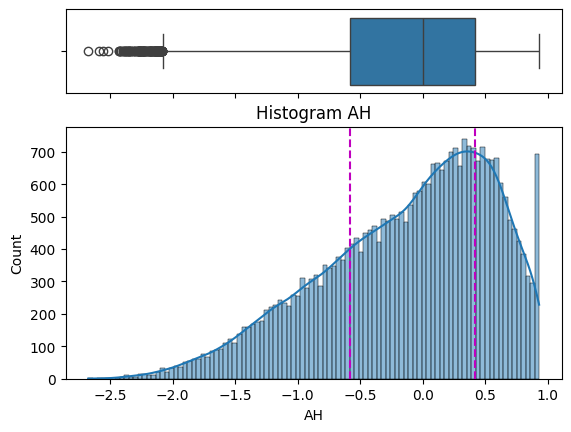

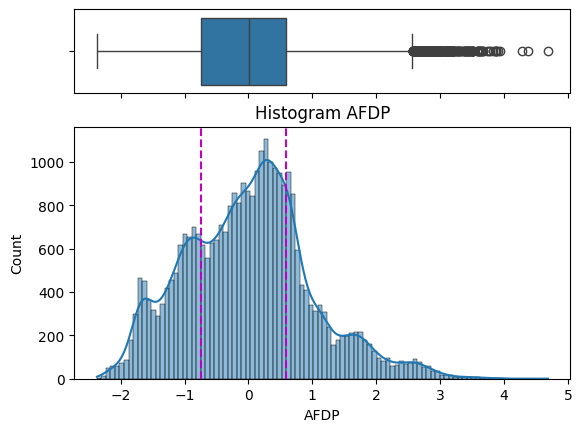

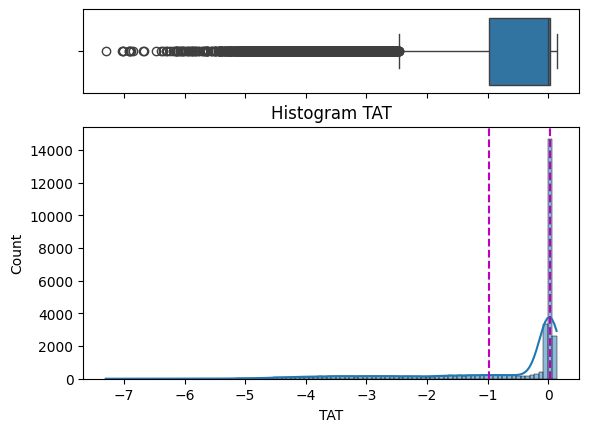

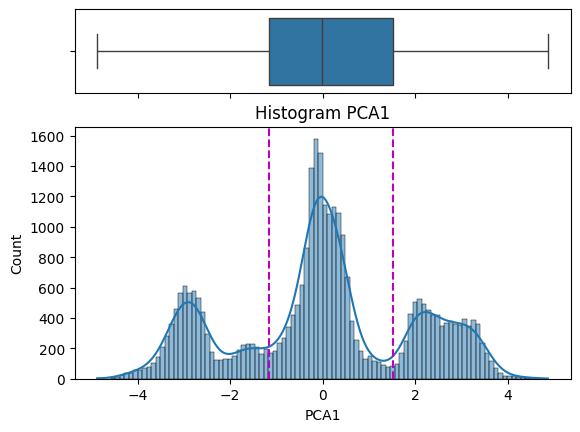

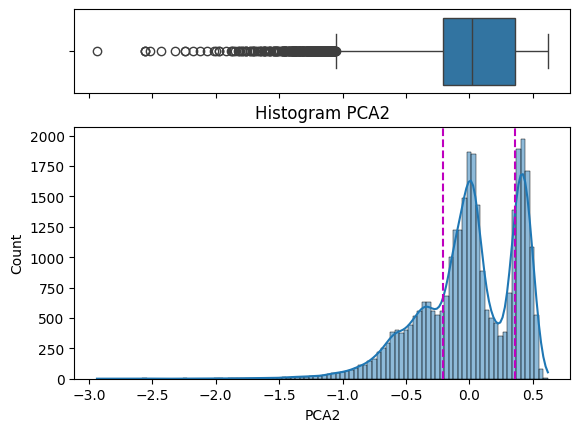

In [34]:
box_hist_plot_complete(X_PCA)

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 10],
    'max_features': ['sqrt', None],
    'criterion': ['squared_error']
}
grid_search = GridSearchCV(
    estimator=DT,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Use RMSE as the scoring metric
    verbose=2,
    n_jobs=-1                   # Use all CPU cores for parallel processing
)
grid_search.fit(X_PCA,Y)
# Print the best parameters and best RMSE
print("Best Parameters:", grid_search.best_params_)
best_rmse = (-grid_search.best_score_) ** 0.5
print("Best CV RMSE:", best_rmse)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best CV RMSE: 1.2373899133429571


In [36]:
Scoring_DT = best_rmse

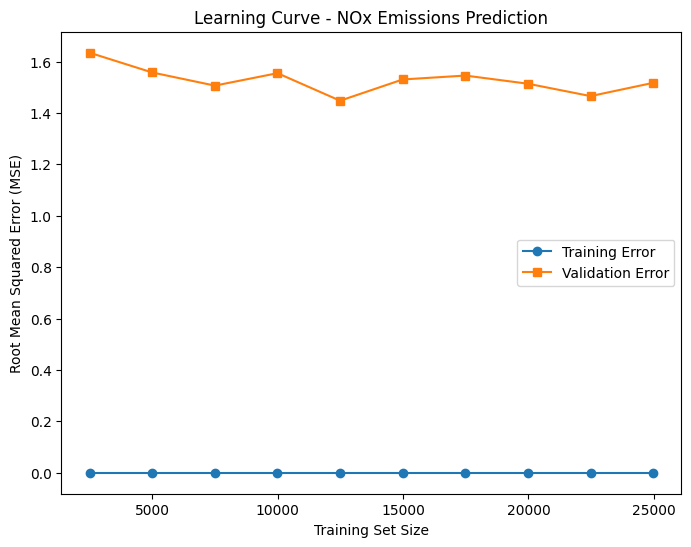

In [37]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    DT, X_PCA, Y, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - NOx Emissions Prediction")
plt.legend()
plt.show()

In [38]:
 from sklearn.ensemble import RandomForestRegressor
 RND = RandomForestRegressor()
scoring_Rnd  = cross_val_score(RND,X_PCA,Y,scoring='neg_root_mean_squared_error',cv=cv)

### This is the code for the gridsearch of random forrest 
As it is going to be time consuming I will not proceed this

In [39]:
# from sklearn.ensemble import RandomForestRegressor
# RND = RandomForestRegressor()
# param_grid = {
#     'n_estimators': [200, 300],               # Number of trees in the forest
#     'max_depth': [None, 10],              # Maximum depth of each tree              # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2],                # Minimum samples required at each leaf node,       # Number of features to consider at each split
#                        # Whether to bootstrap samples
#     'criterion': ['squared_error']  # Loss function (MSE or MAE)
# }
# grid_search = GridSearchCV(
#     estimator=RND,
#     param_grid=param_grid,
#     cv=5,                        # 5-fold cross-validation
#     scoring='neg_mean_squared_error',  # Use RMSE as the scoring metric
#     verbose=2,
#     n_jobs=-1                   # Use all CPU cores for parallel processing
# )
# grid_search.fit(X_PCA,Y)
# # Print the best parameters and best RMSE
# print("Best Parameters:", grid_search.best_params_)
# best_rmse = (-grid_search.best_score_) ** 0.5
# print("Best CV RMSE:", best_rmse)

In [40]:
scoring_Rnd

array([-1.15957593, -1.10607296, -1.07124027, -1.23465948, -0.97905554])

In [41]:
from sklearn.svm import SVR
svr = SVR()
scoring_SVC= cross_val_score(svr,X_PCA,Y,scoring='neg_root_mean_squared_error',cv=cv)

In [42]:
scoring_SVC

array([-1.29274249, -1.27760934, -1.18369133, -1.42676342, -1.11850626])

In [43]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    svr, X_PCA, Y, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - NOx Emissions Prediction")
plt.legend()
plt.show()

KeyboardInterrupt: 

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300],        # Number of boosting stages
    'learning_rate': [0.05, 0.1],    # Learning rate
    'max_depth': [3, 5],                # Maximum tree depth
    'min_samples_split': [2, 10],       # Min samples required to split a node
    'min_samples_leaf': [1,  5],         # Min samples required at leaf node
    'subsample': [0.6, 1.0],          # Fraction of samples used for each tree
    'max_features': ['sqrt', 'log2'] # Number of features to consider for splits
}

# Initialize the model
xgb = GradientBoostingRegressor(random_state=42)

# Perform RandomizedSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,                 
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1,
    
)

# Fit the model
grid_search.fit(X_PCA, Y)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
best_rmse_xgb = (-grid_search.best_score_) ** 0.5
print("Best CV RMSE (XGBoost):", best_rmse_xgb)



Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 1.0}
Best CV RMSE (XGBoost): 1.1408542254133205


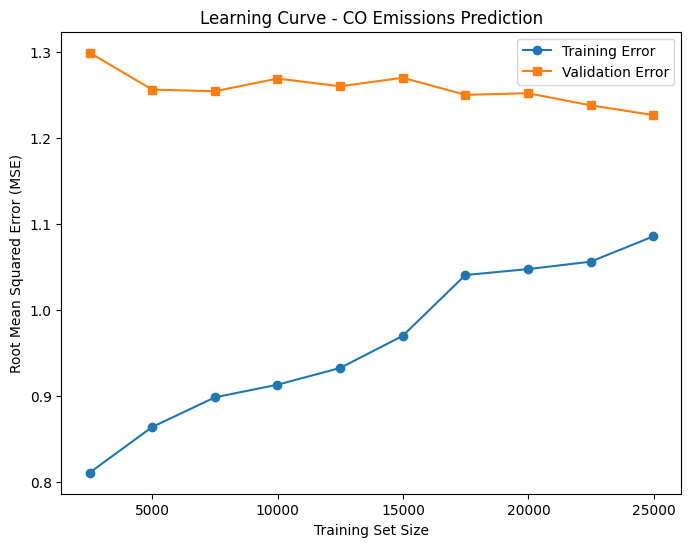

In [45]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb, X_PCA, Y, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - CO Emissions Prediction")
plt.legend()
plt.show()

In [46]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 1.0}

In [47]:
gradient = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=300,subsample=1.0)
Gradient_score = cross_val_score(gradient,X_PCA,Y,scoring='neg_root_mean_squared_error',cv=cv)


In [48]:
Gradient_score

array([-1.19546876, -1.11239616, -1.10287581, -1.24809288, -1.02262789])

In [49]:
import xgboost as xg

In [50]:


# Convert dataset into DMatrix (XGBoost's optimized data structure)
dtrain = xg.DMatrix(X_PCA, label=Y)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Perform 5-fold cross-validation with early stopping
cv_results = xg.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,  # Maximum boosting rounds
    nfold=5,  # Number of folds
    metrics='rmse',  # Metric to evaluate
    early_stopping_rounds=10,  # Stop if no improvement after 10 rounds
    as_pandas=True,  # Return as DataFrame
    seed=42
)

# Print the best iteration with lowest RMSE
best_iteration = cv_results['test-rmse-mean'].idxmin()
print(f"Best iteration: {best_iteration}")
print(cv_results.iloc[best_iteration])


Best iteration: 483
train-rmse-mean    0.629949
train-rmse-std     0.006219
test-rmse-mean     1.133365
test-rmse-std      0.073357
Name: 483, dtype: float64


In [51]:
Scoring_XGB = cv_results.iloc[best_iteration]

In [52]:
Scoring_XGB[2]

C:\Users\Omid\AppData\Local\Temp\ipykernel_33696\2897892943.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Scoring_XGB[2]


np.float64(1.1333648283864302)

In [53]:
print(f" Cross Validation Score for Decision tree:",Scoring_DT)
print(f" Cross Validation Score for Random forest:",scoring_Rnd.mean())
print(f" Cross Validation Score for Gradient Boosting:",Gradient_score.mean())
print(f" Cross Validation Score for XGboost:",Scoring_XGB[2])

 Cross Validation Score for Decision tree: 1.2373899133429571
 Cross Validation Score for Random forest: -1.1101208367417525
 Cross Validation Score for Gradient Boosting: -1.1362922987302557
 Cross Validation Score for XGboost: 1.1333648283864302


C:\Users\Omid\AppData\Local\Temp\ipykernel_33696\4102564974.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f" Cross Validation Score for XGboost:",Scoring_XGB[2])


## Making a pipeline

In [54]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Columns for transformations
PCA_Columns = ['GTEP','TIT','TEY','CDP']
Standard_Columns = ['AP','AT','AFDP','GTEP','TIT','TEY','CDP']
Robust_columns = ['AH','TAT']


preprocessor = ColumnTransformer([
    ('standard', StandardScaler(), Standard_Columns),  # Apply StandardScaler
    ('robust', RobustScaler(), Robust_columns),  # Apply RobustScaler
])


In [55]:
X_test_Standardized = pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [56]:
X_test_Standardized

,standard__AP,standard__AT,standard__AFDP,standard__GTEP,standard__TIT,standard__TEY,standard__CDP,robust__AH,robust__TAT
0,-1.314357,-0.678117,-0.330825,1.333839,1.040564,1.358424,1.258190,0.105962,-1.597734
1,-0.217811,1.147293,-0.206315,-0.038122,0.509336,-0.061000,0.019024,-0.627072,0.013220
2,-1.512345,-0.437760,-1.433998,-1.558241,-1.661275,-1.611971,-1.594837,0.633784,0.005666
3,-0.004594,-0.753021,1.123134,1.589706,1.057701,1.693387,1.701012,0.312193,-3.654391
4,0.269542,-0.020285,-0.291314,-0.350475,-0.176120,-0.172013,-0.220339,0.049718,0.079320
...,...,...,...,...,...,...,...,...,...
5505,-0.857463,0.449954,0.804321,-0.145590,0.383669,-0.068059,-0.054626,0.718267,0.026440
5506,1.183331,-1.556512,3.007418,1.957349,1.057701,2.031559,2.014947,0.742107,-4.491029
5507,0.071555,0.528306,0.677731,-0.120458,0.435078,-0.046241,-0.026086,0.569808,0.045326
5508,-0.248271,-0.145568,0.460294,-0.156122,-0.107575,-0.020573,-0.189038,0.844783,0.041549


In [57]:


pca = PCA(n_components=2)
Energy_test = pca.fit_transform(X_test_Standardized[['standard__GTEP','standard__TIT','standard__TEY','standard__CDP']])


In [58]:
Energy_test.shape

(5510, 2)

In [59]:
 X_test_Standardized[['PCA1','PCA2']] = Energy_test
X_test_Standardized.drop(columns=['standard__GTEP','standard__TIT','standard__TEY','standard__CDP'],inplace=True)

In [60]:
X_test_Standardized

,standard__AP,standard__AT,standard__AFDP,robust__AH,robust__TAT,PCA1,PCA2
0,-1.314357,-0.678117,-0.330825,0.105962,-1.597734,2.499466,-0.190622
1,-0.217811,1.147293,-0.206315,-0.627072,0.013220,0.205631,0.459454
2,-1.512345,-0.437760,-1.433998,0.633784,0.005666,-3.211455,-0.127677
3,-0.004594,-0.753021,1.123134,0.312193,-3.654391,3.031030,-0.441025
4,0.269542,-0.020285,-0.291314,0.049718,0.079320,-0.459887,0.078018
...,...,...,...,...,...,...,...
5505,-0.857463,0.449954,0.804321,0.718267,0.026440,0.050078,0.415581
5506,1.183331,-1.556512,3.007418,0.742107,-4.491029,3.546342,-0.726251
5507,0.071555,0.528306,0.677731,0.569808,0.045326,0.113074,0.438835
5508,-0.248271,-0.145568,0.460294,0.844783,0.041549,-0.236737,0.020576


## Hyper Parameter Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV

#  Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'max_features': ['sqrt'],  # Feature selection
    'bootstrap': [True, False]  # Use bootstrap sampling
}

#  Initialize model
rf = RandomForestRegressor(random_state=42)

#  Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf, param_distributions=param_grid,
    n_iter=10,  # Number of random combinations
    cv=5,  # 5-fold cross-validation
    scoring='neg_root_mean_squared_error',
    n_jobs=-1, verbose=2, random_state=42
)

#  Train and search for best parameters
random_search.fit(X_PCA, Y)

#  Get best parameters
print("Best Parameters:", random_search.best_params_)

# #  Evaluate on Test Set
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# print(f"Optimized RMSE: {rmse:.4f}")
# print(f"Optimized R²: {r2:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [62]:
X_test_Standardized.columns=[ 'AP','AT', 'AFDP','AH',  'TAT', 'PCA1', 'PCA2']
X_test_Standardized

,AP,AT,AFDP,AH,TAT,PCA1,PCA2
0,-1.314357,-0.678117,-0.330825,0.105962,-1.597734,2.499466,-0.190622
1,-0.217811,1.147293,-0.206315,-0.627072,0.013220,0.205631,0.459454
2,-1.512345,-0.437760,-1.433998,0.633784,0.005666,-3.211455,-0.127677
3,-0.004594,-0.753021,1.123134,0.312193,-3.654391,3.031030,-0.441025
4,0.269542,-0.020285,-0.291314,0.049718,0.079320,-0.459887,0.078018
...,...,...,...,...,...,...,...
5505,-0.857463,0.449954,0.804321,0.718267,0.026440,0.050078,0.415581
5506,1.183331,-1.556512,3.007418,0.742107,-4.491029,3.546342,-0.726251
5507,0.071555,0.528306,0.677731,0.569808,0.045326,0.113074,0.438835
5508,-0.248271,-0.145568,0.460294,0.844783,0.041549,-0.236737,0.020576


In [63]:
X_PCA.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'TAT', 'PCA1', 'PCA2'], dtype='object')

In [64]:
X_PCA

,AT,AP,AH,AFDP,TAT,PCA1,PCA2
8537,-1.591373,2.290015,-0.305982,0.620440,0.026316,-0.264614,0.340673
29199,-0.268229,0.629692,-1.155290,-0.282862,-1.315789,2.606744,-0.312024
5707,0.930103,-0.177194,-0.554418,0.133421,0.031955,0.409687,0.481408
19735,1.718089,0.288317,-1.194918,-0.043677,0.022556,-2.489839,0.058289
10299,1.523078,0.055562,-1.635097,0.290124,0.007519,0.286731,0.438458
...,...,...,...,...,...,...,...
16850,-0.042667,-2.794917,-0.859168,-1.530679,0.037594,-2.822981,-0.078313
6265,-0.454627,0.893482,0.384623,-0.002500,0.028195,-0.084632,0.450839
11284,0.921893,-0.192711,-0.463074,0.264954,-0.054511,0.448569,0.465757
860,-1.468741,0.490039,0.304939,0.068236,0.071429,-0.150554,0.349308


In [65]:
X_test_Standardized = X_test_Standardized.reindex(columns=X_PCA.columns)

In [66]:
 RND_final = RandomForestRegressor(n_estimators=100,
                                   min_samples_split=2,
                                   min_samples_leaf=2,
                                   max_features='sqrt',
                                   max_depth=50,
                                   bootstrap=False)


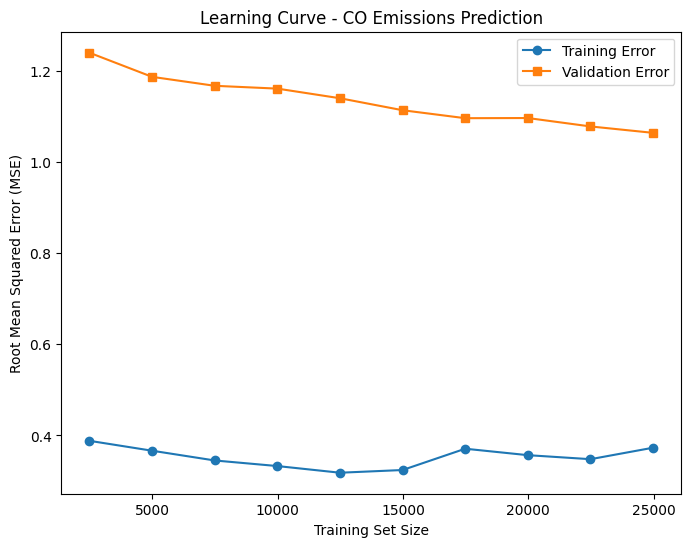

In [67]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    RND_final, X_PCA, Y, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - CO Emissions Prediction")
plt.legend()
plt.show()

In [68]:
RND_final.fit(X_PCA,Y)
Y_Pred = RND_final.predict(np.array(X_test_Standardized))

c:\Users\Omid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [69]:
from sklearn.metrics import root_mean_squared_error
RMSE = root_mean_squared_error(Y_test,Y_Pred)


In [70]:
RMSE

1.0833083877162077

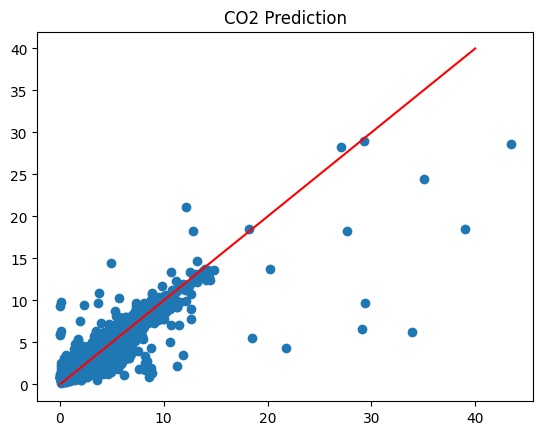

In [71]:


plt.figure()
plt.title('CO2 Prediction')
plt.scatter(Y_test,Y_Pred)
plt.plot([0,40],[0,40],color='red')
plt.show()

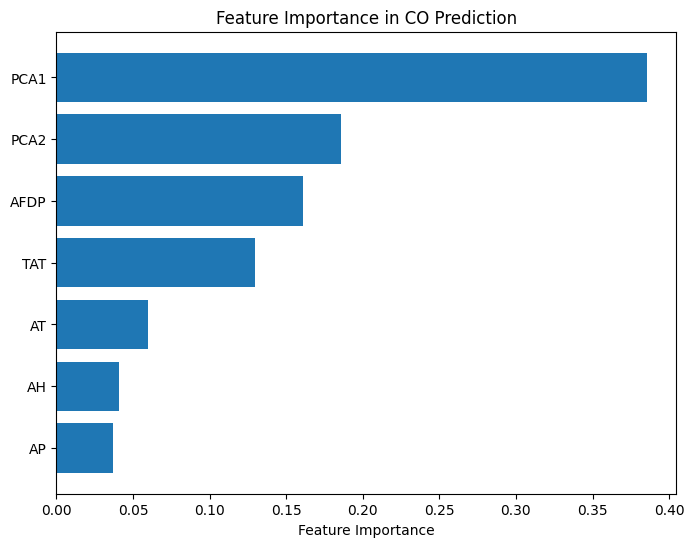

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = RND_final.feature_importances_
features = X_PCA.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(8, 6))
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in CO Prediction")
plt.show()


In [73]:
X_PCA_new = X_PCA.drop(columns=['AT','AH','AP'])
X_PCA_new.head()

,AFDP,TAT,PCA1,PCA2
8537,0.620440,0.026316,-0.264614,0.340673
29199,-0.282862,-1.315789,2.606744,-0.312024
5707,0.133421,0.031955,0.409687,0.481408
19735,-0.043677,0.022556,-2.489839,0.058289
10299,0.290124,0.007519,0.286731,0.438458


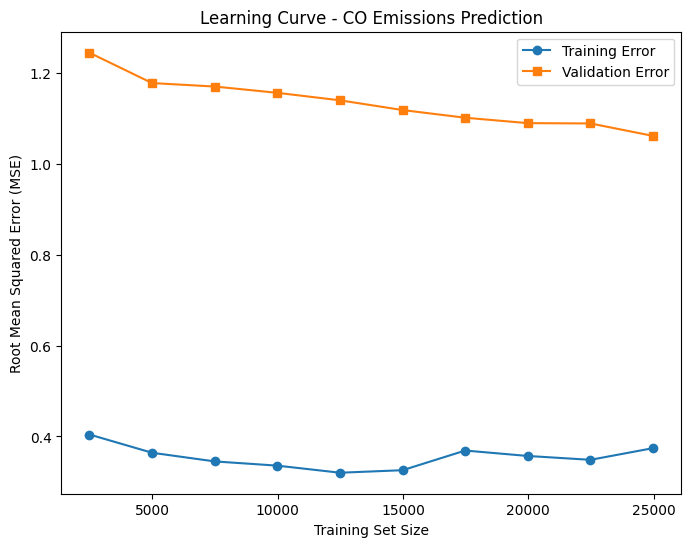

In [74]:
train_sizes, train_scores, test_scores = learning_curve(
    RND_final, X_PCA, Y, cv=5, scoring="neg_root_mean_squared_error", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Convert negative MSE to positive
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Error", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Error", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Root Mean Squared Error (MSE)")
plt.title("Learning Curve - CO Emissions Prediction")
plt.legend()
plt.show()